In [13]:
import numpy as np
from scipy.optimize import least_squares

# Points on Mars orbit
points = np.array(
    [
        [-1.4500116674, 0.862669627],
        [-1.552254459, 0.6250233661],
        [-1.63225309, -0.1485003916],
        [1.1939234575, -0.6865293569],
        [1.0739307835, 1.0511605431],
    ]
)


# Function to calculate the residuals
def residuals(params, points):
    a, b, r = params
    distances = np.sqrt((points[:, 0] - a) ** 2 + (points[:, 1] - b) ** 2)
    return distances - r


# Initial guess for the center (a, b) and radius r
initial_guess = [np.mean(points[:, 0]), np.mean(points[:, 1]), 1.0]

# Least squares optimization
result = least_squares(residuals, initial_guess, args=(points,))

# Fitted circle parameters: center (a, b) and radius r
a, b, r = result.x

# Calculate the distance from the origin to the center of the circle
d = np.sqrt(a**2 + b**2)

# Eccentricity as the ratio of the distance to the origin and the radius
eccentricity = d / r

# Print the results
print(f"Center: ({a:.3f}, {b:.3f})")
print(f"Radius: {r:.3f}")
print(f"Eccentricity: {eccentricity:.3f}")

Center: (-0.121, 0.096)
Radius: 1.530
Eccentricity: 0.101


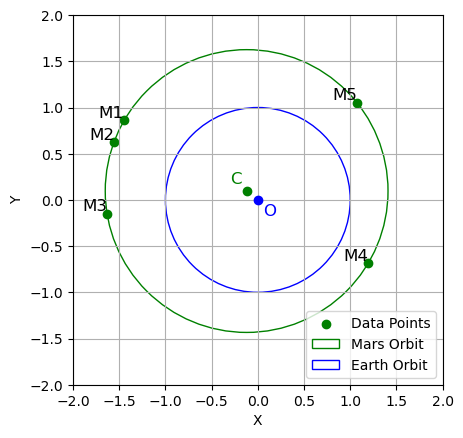

In [14]:
import matplotlib.pyplot as plt

# Earth orbit at origin and unit radius
earth_orbit_center = (0, 0)
earth_orbit_radius = 1

fig, ax = plt.subplots()

# Plot the points
ax.scatter(points[:, 0], points[:, 1], color="green", label="Data Points")

# Annotate the points with labels M1, M2, etc.
for i, (x, y) in enumerate(points):
    ax.text(
        x,
        y,
        f"M{i+1}",
        fontsize=12,
        ha="right",
        color="black",
        verticalalignment="bottom",
    )

# Plot Mars Orbit
mars_orbit = plt.Circle((a, b), r, color="green", fill=False, label="Mars Orbit")
ax.add_artist(mars_orbit)

# Plot Earth Orbit
earth_orbit = plt.Circle(
    earth_orbit_center,
    earth_orbit_radius,
    color="blue",
    fill=False,
    linestyle="-",
    label="Earth Orbit",
)
ax.add_artist(earth_orbit)

# Plot Earth orbit center
ax.scatter(*earth_orbit_center, color="blue", zorder=5)
ax.text(
    earth_orbit_center[0] + 0.2,
    earth_orbit_center[1] - 0.2,
    "O",
    fontsize=12,
    ha="right",
    color="blue",
    verticalalignment="bottom",
)

# Plot Mars Orbit center
ax.scatter(a, b, color="green", zorder=5)
ax.text(
    a - 0.05,
    b + 0.05,
    "C",
    fontsize=12,
    ha="right",
    color="green",
    verticalalignment="bottom",
)

ax.set_aspect("equal", "box")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend(loc="lower right")
ax.grid(True)

plt.show()